In this project, I am analyzing YouTube data. I will look at specific data within the top genres of YouTube channels and compare them to other variables. I first import pandas, numpy, and matplotlib. I will then upload the data, then look at the first five rows of the data set.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/Users/inezleon/Downloads/top-300-youtube-channels.csv')

In [81]:
df.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,216495600668,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015


Each row is a different channel with static statistics extracted at the time of the creation on this data set. Let's see how many columns and rows are in the data set.

In [82]:
df.shape

(296, 8)

There are 296 rows (or channels) and 8 columns (variables). Let's see if there are any nulls we need to take care of.

In [83]:
df.isna().any()

Unnamed: 0          False
Rank                False
Channel_Name        False
Subscriber_Count    False
Video_Views         False
Video_Count         False
Genre               False
Channel_Started     False
dtype: bool

Thankfully there are none. Let's see what percentage each genre of channel takes up of all the channels in the whole dataset.

In [84]:
genre_pct = df['Genre'].value_counts(normalize=True)

In [85]:
print(genre_pct)

Music               0.381757
Entertainment       0.243243
People & Blogs      0.091216
Film & Animation    0.081081
Gaming              0.060811
Education           0.047297
Comedy              0.037162
News & Politics     0.037162
Sports              0.013514
Howto & Style       0.003378
Pets & Animals      0.003378
Name: Genre, dtype: float64


Let's see how many channels are in each genre in this data set.

In [86]:
df['Genre'].value_counts()

Music               113
Entertainment        72
People & Blogs       27
Film & Animation     24
Gaming               18
Education            14
Comedy               11
News & Politics      11
Sports                4
Howto & Style         1
Pets & Animals        1
Name: Genre, dtype: int64

In [133]:
df.groupby('Genre').mean()

,Unnamed: 0,Rank,Subscriber_Count,Video_Views,Video_Count,Channel_Started
Genre,,,,,,
Comedy,174.636364,175.636364,2.015727e+07,1.668942e+10,2157.363636,2016.272727
Education,91.071429,92.071429,4.495000e+07,3.488291e+10,1026.857143,2012.571429
Entertainment,161.250000,162.250000,2.719847e+07,1.963302e+10,31203.958333,2012.013889
Film & Animation,125.875000,126.875000,4.149167e+07,3.043909e+10,17231.333333,2010.541667
Gaming,163.000000,164.000000,3.226889e+07,1.713644e+10,12383.333333,2011.333333
Howto & Style,58.000000,59.000000,7.890000e+07,2.525169e+10,6022.000000,2016.000000
Music,145.026549,146.026549,3.171301e+07,2.145828e+10,3561.725664,2009.982301
News & Politics,198.545455,199.545455,2.224545e+07,1.517653e+10,148948.272727,2008.818182
People & Blogs,151.000000,152.000000,3.175000e+07,2.363263e+10,21887.962963,2014.703704


Let's populate each genre with however many channel entries are necessary to get as close to Music's count in the data set. The calculation will be based off of the mean of any numerical categorical variables which are Rank, Subscriber_Count, Video_Views, Video_Count, and Channel_Started. 

In [87]:
#Get the count of entries for each genre.
genre_counts = df['Genre'].value_counts()

#Get the name of the top genre.
top_genre = genre_counts.index[0]

#Get the mean statistics for each genre.
genre_means = df.groupby('Genre').mean()

# Create a new empty dataframe to store the balanced dataset
balanced_df = pd.DataFrame(columns=df.columns)

# Loop through the genres that are not the top genre
for genre in genre_counts.index[1:]:
    # Calculate the number of entries to add
    n_entries_to_add = genre_counts[top_genre] - genre_counts[genre]

    # Get the mean statistics for the genre
    genre_mean = genre_means.loc[genre]

    # Repeat the mean statistics n_entries_to_add times
    repeated_mean = pd.concat([genre_mean]*n_entries_to_add, axis=1).T
    
    # Add the genre column to the repeated mean statistics
    repeated_mean['Genre'] = genre

    # Append the repeated mean statistics to the balanced dataframe
    balanced_df = pd.concat([balanced_df, repeated_mean], ignore_index=True)

# Append the original top genre entries to the balanced dataframe
balanced_df = pd.concat([balanced_df, df[df['Genre'] == top_genre]], ignore_index=True)

# Shuffle the balanced dataframe
balanced_df


,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,161.25,162.25,NaN,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
1,161.25,162.25,NaN,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
2,161.25,162.25,NaN,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
3,161.25,162.25,NaN,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
4,161.25,162.25,NaN,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
...,...,...,...,...,...,...,...,...
1055,279.00,280.00,Indosiar,2.340000e+07,1.202071e+10,65623.000000,Music,2013.000000
1056,280.00,281.00,AdeleVEVO,1.510000e+07,1.201895e+10,52.000000,Music,2009.000000
1057,286.00,287.00,OneDirectionVEVO,2.190000e+07,1.189339e+10,266.000000,Music,2010.000000
1058,290.00,291.00,michaeljacksonVEVO,8.080000e+06,1.180622e+10,138.000000,Music,2009.000000


Let's populate the new rows's Channel Name column.

In [89]:
balanced_df['Channel_Name'] = balanced_df['Channel_Name'].fillna('channel')
balanced_df

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,161.25,162.25,channel,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
1,161.25,162.25,channel,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
2,161.25,162.25,channel,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
3,161.25,162.25,channel,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
4,161.25,162.25,channel,2.719847e+07,1.963302e+10,31203.958333,Entertainment,2012.013889
...,...,...,...,...,...,...,...,...
1055,279.00,280.00,Indosiar,2.340000e+07,1.202071e+10,65623.000000,Music,2013.000000
1056,280.00,281.00,AdeleVEVO,1.510000e+07,1.201895e+10,52.000000,Music,2009.000000
1057,286.00,287.00,OneDirectionVEVO,2.190000e+07,1.189339e+10,266.000000,Music,2010.000000
1058,290.00,291.00,michaeljacksonVEVO,8.080000e+06,1.180622e+10,138.000000,Music,2009.000000


Let's turn any decimal values in the data set into integers.

In [127]:
balanced_df['Channel_Started'] = balanced_df['Channel_Started'].astype('int')
balanced_df['Subscriber_Count'] = balanced_df['Subscriber_Count'].astype('int')
balanced_df['Video_Views'] = balanced_df['Video_Views'].astype('int')
balanced_df['Video_Count'] = balanced_df['Video_Count'].astype('int')

balanced_df

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
1,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
2,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
3,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
4,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
...,...,...,...,...,...,...,...,...
1055,279.00,280.00,Indosiar,23400000,12020712027,65623,Music,2013
1056,280.00,281.00,AdeleVEVO,15100000,12018947879,52,Music,2009
1057,286.00,287.00,OneDirectionVEVO,21900000,11893387937,266,Music,2010
1058,290.00,291.00,michaeljacksonVEVO,8080000,11806216949,138,Music,2009


Let's now see how many channels per genre there are.

In [123]:
balanced_df['Genre'].value_counts()

Music               113
Howto & Style       112
Pets & Animals      112
Sports              109
Comedy              102
News & Politics     102
Education            99
Gaming               95
Film & Animation     89
People & Blogs       86
Entertainment        41
Name: Genre, dtype: int64

The data is no longer skewed. Although it is good to be able to populate a data set, the unequal distribution of channels per genre may accurately represent how many of each genre are actually on YouTube. For this reason, I will maintain df instead of balanced_df for the rest of the project.

The top five genres of video are Music, Entertainment, People and Blogs, Film & Animation, and Gaming. Let's subset these so that they are in their own data frame which we can work with.

In [128]:
top5 = balanced_df[(balanced_df['Genre'] == "Music") | (balanced_df['Genre'] == "Entertainment") | (balanced_df['Genre'] == "People & Blogs") | (balanced_df['Genre'] == "Film & Animation") | (balanced_df['Genre'] == "Gaming")]


In [129]:
top5.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
1,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
2,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
3,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012
4,161.25,162.25,channel,27198472,19633015693,31203,Entertainment,2012


This lets us know that any calculations we perform will be skewed towards those genres that have more channels. We will only be using the top 5 channels in this data set since the rest are so underrepresented.

In [130]:
top5sub = top5[['Genre', 'Channel_Started', 'Subscriber_Count']]
top5sub

,Genre,Channel_Started,Subscriber_Count
0,Entertainment,2012,27198472
1,Entertainment,2012,27198472
2,Entertainment,2012,27198472
3,Entertainment,2012,27198472
4,Entertainment,2012,27198472
...,...,...,...
1055,Music,2013,23400000
1056,Music,2009,15100000
1057,Music,2010,21900000
1058,Music,2009,8080000


Let's see how many total views each genre has in the original data set.

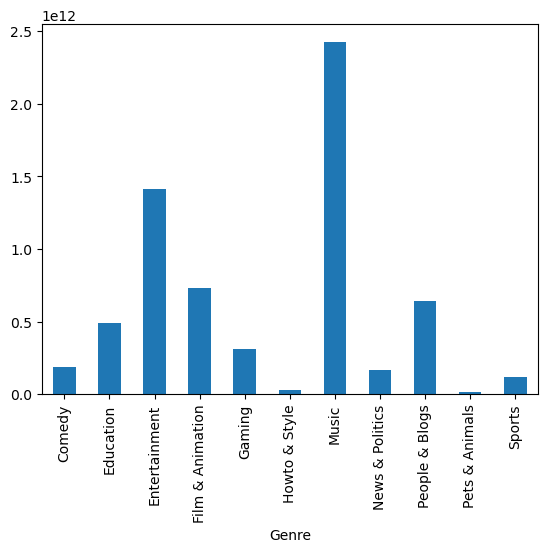

In [131]:
df.groupby("Genre")["Video_Views"].sum().plot(kind='bar')
plt.show()

Now in the populated one.

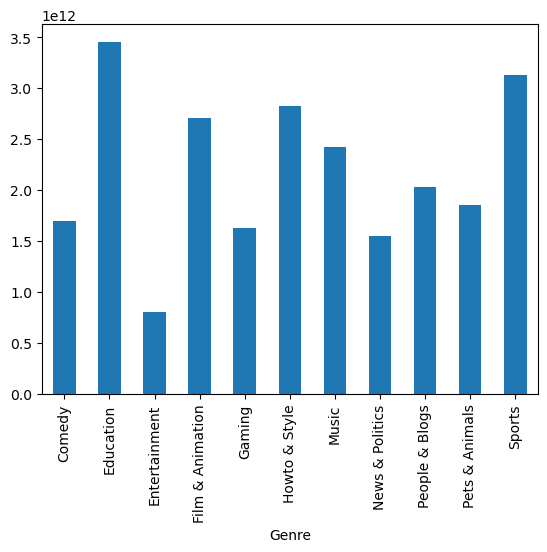

In [132]:
balanced_df.groupby("Genre")["Video_Views"].sum().plot(kind='bar')
plt.show()

Wow there's a big difference between the results from the original data and the populated data. (ADD TO)

In [95]:
genre_year = df.pivot_table(values='Subscriber_Count', columns ='Channel_Started', index='Genre', aggfunc=np.sum)
genre_year

Channel_Started,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Genre,,,,,,,,,,,,,,,,,
Comedy,NaN,30700000.0,NaN,NaN,NaN,29400000.0,NaN,NaN,6830000.0,14000000.0,NaN,23300000.0,36900000.0,NaN,NaN,33700000.0,46900000.0
Education,NaN,191800000.0,NaN,32100000.0,NaN,NaN,106500000.0,NaN,61900000.0,121300000.0,29600000.0,63800000.0,NaN,22300000.0,NaN,NaN,NaN
Entertainment,122800000.0,247100000.0,155800000.0,90900000.0,29530000.0,45800000.0,39800000.0,248400000.0,110640000.0,204100000.0,221300000.0,130420000.0,78300000.0,161500000.0,18300000.0,36600000.0,17000000.0
Film & Animation,39800000.0,295500000.0,77500000.0,92700000.0,53500000.0,NaN,57300000.0,127900000.0,86200000.0,108800000.0,30300000.0,26300000.0,NaN,NaN,NaN,NaN,NaN
Gaming,NaN,17200000.0,29000000.0,33600000.0,21800000.0,111000000.0,35640000.0,125600000.0,102400000.0,67700000.0,36900000.0,NaN,NaN,NaN,NaN,NaN,NaN
Howto & Style,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78900000.0,NaN,NaN,NaN,NaN,NaN
Music,73300000.0,595600000.0,367500000.0,265200000.0,489360000.0,253400000.0,374420000.0,428670000.0,205800000.0,367400000.0,36700000.0,97220000.0,NaN,29000000.0,NaN,NaN,NaN
News & Politics,14800000.0,58600000.0,42000000.0,NaN,55700000.0,15600000.0,NaN,11500000.0,20800000.0,NaN,NaN,25700000.0,NaN,NaN,NaN,NaN,NaN
People & Blogs,40800000.0,NaN,NaN,65400000.0,NaN,22300000.0,30300000.0,35500000.0,10400000.0,94850000.0,195000000.0,222800000.0,38200000.0,22000000.0,NaN,20900000.0,58800000.0


Let's subset the genres that have the least null values.

In [96]:
genre_year = genre_year.loc[['Music', 'Entertainment', 'Film & Animation', 'Gaming']]
genre_year

Channel_Started,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Genre,,,,,,,,,,,,,,,,,
Music,73300000.0,595600000.0,367500000.0,265200000.0,489360000.0,253400000.0,374420000.0,428670000.0,205800000.0,367400000.0,36700000.0,97220000.0,NaN,29000000.0,NaN,NaN,NaN
Entertainment,122800000.0,247100000.0,155800000.0,90900000.0,29530000.0,45800000.0,39800000.0,248400000.0,110640000.0,204100000.0,221300000.0,130420000.0,78300000.0,161500000.0,18300000.0,36600000.0,17000000.0
Film & Animation,39800000.0,295500000.0,77500000.0,92700000.0,53500000.0,NaN,57300000.0,127900000.0,86200000.0,108800000.0,30300000.0,26300000.0,NaN,NaN,NaN,NaN,NaN
Gaming,NaN,17200000.0,29000000.0,33600000.0,21800000.0,111000000.0,35640000.0,125600000.0,102400000.0,67700000.0,36900000.0,NaN,NaN,NaN,NaN,NaN,NaN


Now let's get rid of the year columns that have way too many nulls to be able to visualize.

In [97]:
genre_year = genre_year.drop(columns=[2017, 2018, 2019, 2020, 2021])

In [98]:
genre_year

Channel_Started,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,,
Music,73300000.0,595600000.0,367500000.0,265200000.0,489360000.0,253400000.0,374420000.0,428670000.0,205800000.0,367400000.0,36700000.0,97220000.0
Entertainment,122800000.0,247100000.0,155800000.0,90900000.0,29530000.0,45800000.0,39800000.0,248400000.0,110640000.0,204100000.0,221300000.0,130420000.0
Film & Animation,39800000.0,295500000.0,77500000.0,92700000.0,53500000.0,NaN,57300000.0,127900000.0,86200000.0,108800000.0,30300000.0,26300000.0
Gaming,NaN,17200000.0,29000000.0,33600000.0,21800000.0,111000000.0,35640000.0,125600000.0,102400000.0,67700000.0,36900000.0,NaN


Let's fill the null values with 0 so that calculations can be executed correctly.

In [99]:
genre_year = genre_year.fillna(0)

Now let's calculate the percentage of subscriber count of each year compared to the total subscriber count amonst all the years in the data frame per genre.

In [100]:
genre_year['total'] = genre_year[2005] + genre_year[2006] + genre_year[2007] + genre_year[2008] + genre_year[2009] + genre_year[2010] + genre_year[2011] + genre_year[2012] + genre_year[2013] + genre_year[2014] + genre_year[2015] + genre_year[2016]
genre_year['2005pct'] = round((genre_year[2005]/genre_year['total'])*100, 2)
genre_year['2006pct'] = round((genre_year[2006]/genre_year['total'])*100, 2)
genre_year['2007pct'] = round((genre_year[2007]/genre_year['total'])*100, 2)
genre_year['2008pct'] = round((genre_year[2008]/genre_year['total'])*100, 2)
genre_year['2009pct'] = round((genre_year[2009]/genre_year['total'])*100, 2)
genre_year['2010pct'] = round((genre_year[2010]/genre_year['total'])*100, 2)
genre_year['2011pct'] = round((genre_year[2011]/genre_year['total'])*100, 2)
genre_year['2012pct'] = round((genre_year[2012]/genre_year['total'])*100, 2)
genre_year['2013pct'] = round((genre_year[2013]/genre_year['total'])*100, 2)
genre_year['2014pct'] = round((genre_year[2014]/genre_year['total'])*100, 2)
genre_year['2015pct'] = round((genre_year[2015]/genre_year['total'])*100, 2)
genre_year['2016pct'] = round((genre_year[2016]/genre_year['total'])*100, 2)
genre_year_pct = genre_year[['total', '2005pct', '2006pct', '2007pct', '2008pct', '2009pct', '2010pct', '2011pct', '2012pct', '2013pct', '2014pct', '2015pct', '2016pct']]
genre_year_pct

Channel_Started,total,2005pct,2006pct,2007pct,2008pct,2009pct,2010pct,2011pct,2012pct,2013pct,2014pct,2015pct,2016pct
Genre,,,,,,,,,,,,,
Music,3.554570e+09,2.06,16.76,10.34,7.46,13.77,7.13,10.53,12.06,5.79,10.34,1.03,2.74
Entertainment,1.646590e+09,7.46,15.01,9.46,5.52,1.79,2.78,2.42,15.09,6.72,12.40,13.44,7.92
Film & Animation,9.958000e+08,4.00,29.67,7.78,9.31,5.37,0.00,5.75,12.84,8.66,10.93,3.04,2.64
Gaming,5.808400e+08,0.00,2.96,4.99,5.78,3.75,19.11,6.14,21.62,17.63,11.66,6.35,0.00


In [160]:
year_pct_plot = pd.melt(genre_year_pct, id_vars='total', value_vars=['2005pct','2006pct','2007pct','2008pct','2009pct','2010pct','2011pct','2012pct','2013pct','2014pct','2015pct','2016pct'], var_name='Year', value_name='subcount_pct_genre', col_level=0)
year_pct_plot = year_pct_plot[['Year', 'subcount_pct_genre']]
year_pct_plot

,Year,subcount_pct_genre
0,2005pct,2.06
1,2005pct,7.46
2,2005pct,4.00
3,2005pct,0.00
4,2006pct,16.76
5,2006pct,15.01
6,2006pct,29.67
7,2006pct,2.96
8,2007pct,10.34
9,2007pct,9.46


In [166]:
year_pct_plot.plot(kind='bar')

<AxesSubplot:>

We can analyse this data and note years within each genre that make up the highest subscriber count out of all the years. For example, 16.76% of the music genre's total subscriber count for this data set were earned from channels started in 2006.

Let's use seaborn in order to make effective visualizations.

I will make a line plot comparing subscriber count and the year channels started across the top five genres of channel.

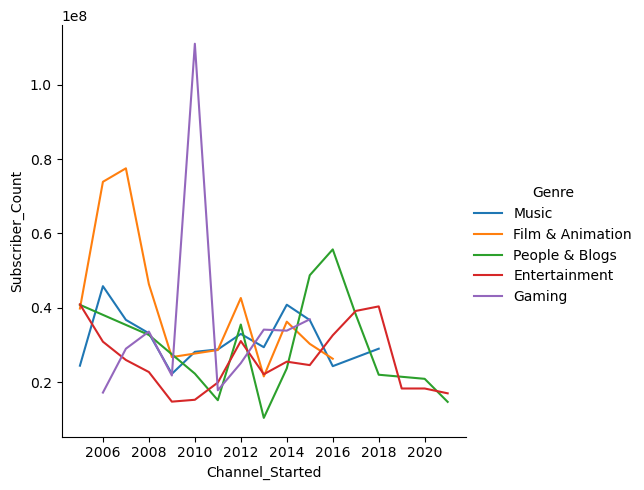

In [120]:
genre_chanstart_subcount = sns.relplot(x='Channel_Started', y='Subscriber_Count', kind='line', data=top5, hue='Genre', ci=None)
plt.show()

In this plot there are spikes of note: Film & Animation in 2006/2007, Gaming in 2010 (probably because of the release of Minecraft?), People & Blogs in 2016 (the height of vlogger culture). If this were an analysis for YouTube corporate, it may be smart to subsidise sponsorships with channels in fairly stable and successful genres of YouTube channels.

Let's create the same plot but this time comparing video views and years channels were started.

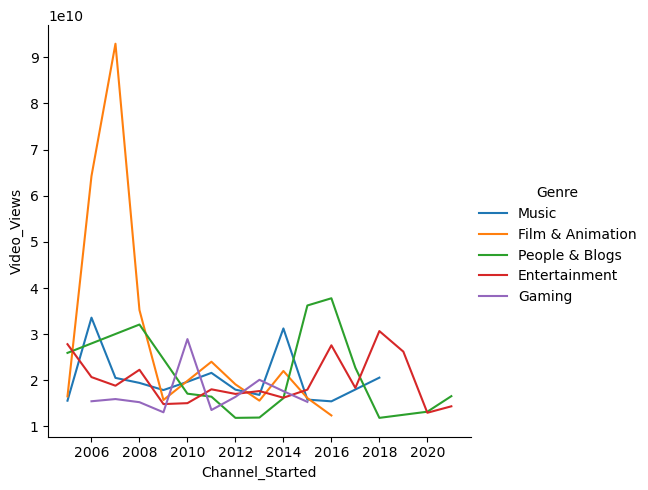

In [117]:
genre_chanstart_vidviews = sns.relplot(x='Channel_Started', y='Video_Views', kind='line', data=top5, hue='Genre', ci=None)
plt.show()

In this data set, Film and Animation had a huge spike of video views around 2006/7. The rest of the notable spikes relatively follow those of the subscriber plot. This plot is also not as dramatic as the previous plot since people always subscribe to channels without actually consistently watching those channels' videos.

Let's look at the IQR's and the range of different statistics across the top five channels comparing video views.

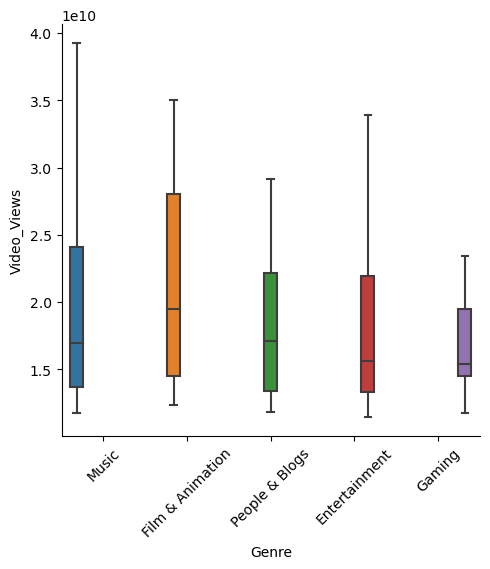

In [118]:
sns.catplot(x='Genre', y='Video_Views', data=top5, kind='box', hue='Genre', sym="")
plt.xticks(rotation=45)
plt.show()

Most variance and range of video views between channels in Film & Animation genre and tightest range for channels in the Gaming genre.

Let's make the same plot comparing subscriber count across the top five channels.

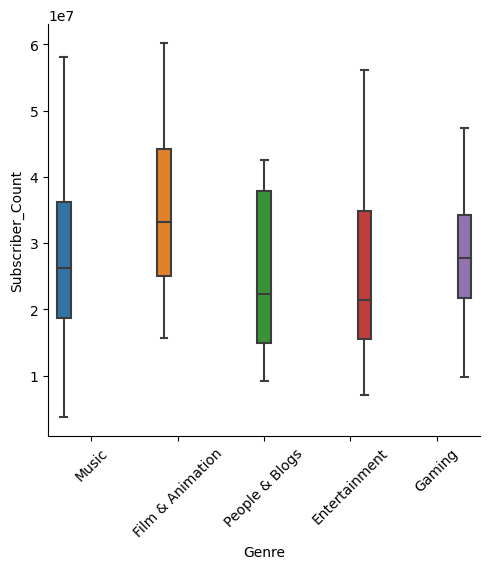

In [119]:
sns.catplot(x='Genre', y='Subscriber_Count', data=top5, kind='box', hue='Genre', sym="")
plt.xticks(rotation=45)
plt.show()

Most variance and widest range between channels in the People & Blogs genre and the tightest range between channels in the Gaming genre again. Gaming channels have most consistency in subscriber count and video views.